In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('bankrefined.csv')

In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [6]:
import xgboost as xgb
from xgboost import XGBClassifier, callback
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score
def custom_recall(preds, dtrain):
    labels = dtrain.get_label()
    preds = np.round(preds)
    recall = recall_score(labels, preds)
    return 'recall', recall

In [9]:
estimators = [('clf', XGBClassifier(eval_metric=custom_recall, random_state=1))]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False,
                               eval_metric=<function custom_recall at 0x7d894c392d40>,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

In [11]:
!pip install scikit-optimize
!pip install 'scikit-optimize[plots]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.7 MB/s eta 0:00:00


In [12]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [13]:
search_space = {
    'clf__n_estimators': Integer(100, 1000),
    'clf__max_depth': Integer(2,10),
    'clf__learning_rate': Real(0.01, 0.4, prior='log-uniform'),
    'clf__min_child_weight': Real(1,5),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 5.0),
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=100, scoring='recall', random_state=1)

In [14]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=<function custom_recall at 0x7d894c392d40>,
                                                       feature_types=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance...
                             'clf__min_child_weight': Real(low=1, high=5, prior='uniform', transform='normalize'),
                             'clf__n_estimators': Integer(low=100, high=1000, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [15]:
model=opt.best_estimator_
model

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=1.0, colsample_bynode=1.0,
                               colsample_bytree=0.5, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False,
                               eval_metric=<function custom_recall at 0x7d894c392d40>,
                               feature_types=None, gamma=1.664658571951208,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.03244865705074375, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=10,
                               max_leaves=None, min_child_weight=1.0,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1000,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=1, ...))])

In [16]:
params = model.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

memory: None
steps: [('clf', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1.0, colsample_bynode=1.0, colsample_bytree=0.5,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=<function custom_recall at 0x7d894c392d40>,
              feature_types=None, gamma=1.664658571951208, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03244865705074375, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...))]
verbose: False
clf: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1.0, colsample_bynode=1.0, 

In [17]:
paramg={
    'clf__n_estimators': [900, 1000, 1100],
    'clf__max_depth': [9,10,11],
    'clf__learning_rate': [0.03244865705074375, 0.027, 0.037],
    'clf__gamma': [1.664658571951208, 1.56, 1.76],
}

In [18]:
from sklearn.model_selection import GridSearchCV
gmodel = GridSearchCV(estimator=model, param_grid=paramg, cv=3, scoring='recall')

In [19]:
gmodel.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('clf',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=1.0,
                                                      colsample_bynode=1.0,
                                                      colsample_bytree=0.5,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=<function custom_recall at 0x7d894c392d40>,
                                                      feature_types=None,
                                                      gamma=1.664658571951208,
                                                      grow_policy=None,
                                                      i...
                                                      max_leaves=None,
                                                      min_child_weight=1.0,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=1000,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=1, ...))]),
             param_grid={'clf__gamma': [1.664658571951208, 1.56, 1.76],
                         'clf__learning_rate': [0.03244865705074375, 0.027,
                                                0.037],
                         'clf__max_depth': [9, 10, 11],
                         'clf__n_estimators': [900, 1000, 1100]},
             scoring='recall')

In [20]:
params1 = gmodel.get_params()
for param, value in params1.items():
    print(f"{param}: {value}")

cv: 3
error_score: nan
estimator__memory: None
estimator__steps: [('clf', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1.0, colsample_bynode=1.0, colsample_bytree=0.5,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=<function custom_recall at 0x7d894c392d40>,
              feature_types=None, gamma=1.664658571951208, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03244865705074375, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...))]
estimator__verbose: False
estimator__clf: XGBClassifier(base_score=None, booster=None, callback

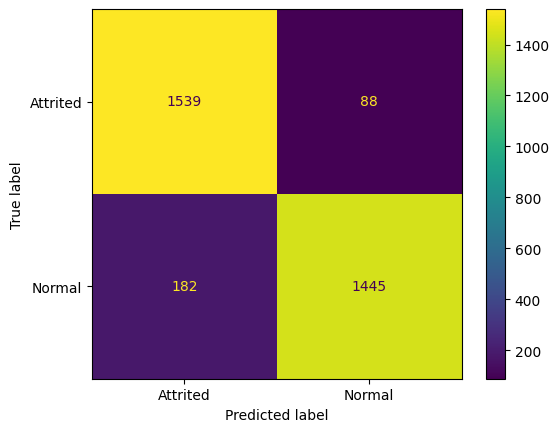

In [21]:
#gmodel = model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = cross_val_predict(model, X, y, cv=10)
cm = confusion_matrix(y, y_pred)
cmdisplay=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Attrited', 'Normal'])
cmdisplay.plot()
plt.show()

In [22]:
recall_score = 1539/(1539+88)
recall_score

0.9459127228027043

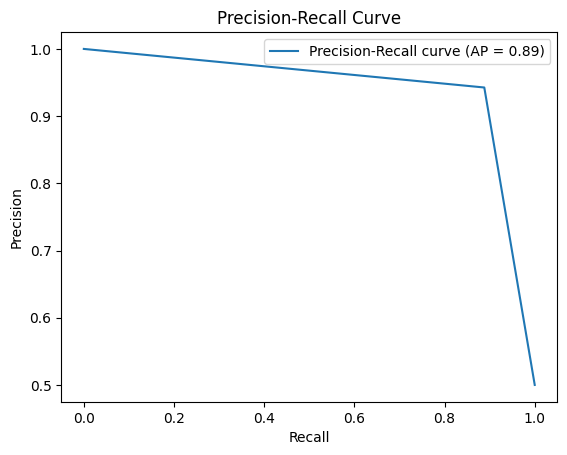

In [23]:
#XGBoost won against random forest
from sklearn.metrics import precision_recall_curve, average_precision_score
p, r, _ = precision_recall_curve(y, y_pred)
avgp = average_precision_score(y, y_pred)
plt.figure()
plt.plot(r, p, label=f'Precision-Recall curve (AP = {avgp:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

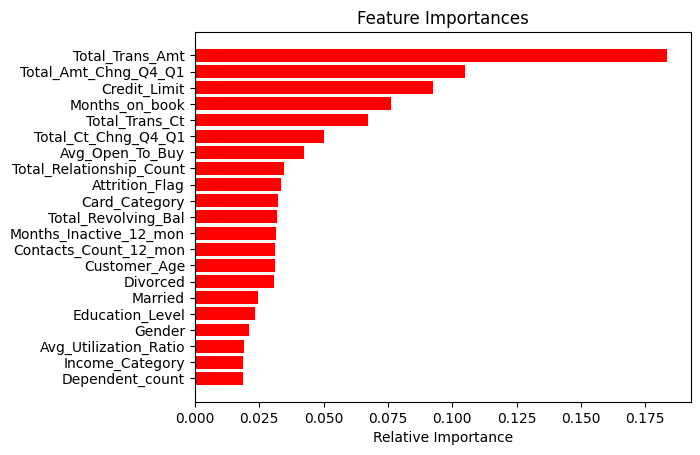

In [34]:
xgb_model = model.named_steps['clf']
features = df.columns
importances = xgb_model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()